# Uniform Cost search problem

## Introduction
Search algorithms play a crucial role in many areas of computer science and artificial intelligence, particularly in pathfinding and graph traversal tasks. This lab focuses on implementing four fundamental search algorithms:

Uninformed Search Strategies:
- Depth-First Search (DFS)
- Breadth-First Search (BFS)

Informed Search Strategies:
- Uniform Cost Search (UCS)
- A* Search

Students will apply these algorithms to a grid-based navigation problem, identifying the most efficient path from a start point to a goal point while avoiding obstacles.

## Environment Setup:

Implement a environment class to model the navigation environment as a 2D grid.
The grid should include obstacles, a start point (S), and a goal point (G).
Implement Search Algorithms:

Implement the DFS and BFS algorithms to explore the grid.
Implement the UCS and A* Search algorithms, utilizing cost functions and heuristics to find optimal paths.

Visualization:

Use a visualization library (e.g., matplotlib) to visually represent the grid, the obstacles, and the paths found by each algorithm.

# Agent Class with a UCS Example

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import heapq
import numpy as np

class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]


# Node Class represents a state in the search tree.
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state  # The current position of the agent in the grid.
        self.parent = parent  # The node in the search tree that generated this node.
        self.action = action  # The action taken to get to this state.
        self.path_cost = path_cost  # Cost from the start node to this node.

    # Comparison operator for priority queue.
    def __lt__(self, other):
        return self.path_cost < other.path_cost


In [46]:
# Environment Class represents the grid and handles state transitions.
class Environment:
    def __init__(self, grid, start, goal):
        self.grid = grid  # The grid layout where 1 represents an obstacle and 0 is free space.
        self.initial = start  # Starting position of the agent.
        self.goal = goal  # Goal position the agent aims to reach.

    # Returns the possible actions from a given state.
    def actions(self, state):
        possible_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        x, y = state

        # Remove impossible actions based on grid boundaries and obstacles.
        if x == 0 or self.grid[x - 1][y] == 1:
            possible_actions.remove('UP')
        if x == len(self.grid) - 1 or self.grid[x + 1][y] == 1:
            possible_actions.remove('DOWN')
        if y == 0 or self.grid[x][y - 1] == 1:
            possible_actions.remove('LEFT')
        if y == len(self.grid[0]) - 1 or self.grid[x][y + 1] == 1:
            possible_actions.remove('RIGHT')

        return possible_actions

    # Returns the state resulting from taking a given action at a given state.
    def result(self, state, action):
        x, y = state
        if action == 'UP':
            return (x - 1, y)
        if action == 'DOWN':
            return (x + 1, y)
        if action == 'LEFT':
            return (x, y - 1)
        if action == 'RIGHT':
            return (x, y + 1)

    # Checks if the goal has been reached.
    def is_goal(self, state):
        return state == self.goal

In [47]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.battery = 100 # int((np.random.randint(100))/10)*10 Initial battery level

     #battery section
    def recharge(self):
        self.battery = 100

    def current_charge(self):
        return self.battery

    # Performs Uniform Cost Search to find the lowest cost path from the initial state to the goal.
    def uniform_cost_search(self):
        frontier = PriorityQueue()  # Priority queue for UCS.
        frontier.put(Node(self.env.initial, path_cost=0), 0)
        came_from = {self.env.initial: None}
        cost_so_far = {self.env.initial: 0}

        while not frontier.empty():
            current_node = frontier.get()

            if self.env.is_goal(current_node.state):
                return self.reconstruct_path(came_from, current_node.state)

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                new_cost = cost_so_far[current_node.state] + 1  # Assuming uniform cost for simplicity; adjust if varying costs.
                if new_state not in cost_so_far or new_cost < cost_so_far[new_state]:
                    cost_so_far[new_state] = new_cost
                    priority = new_cost
                    frontier.put(Node(new_state, current_node, action, new_cost), priority)
                    came_from[new_state] = current_node.state

        return []

    def reconstruct_path(self, came_from, current):
        path = []
        while current in came_from:
            path.append(current)
            current = came_from[current]
        path.append(self.env.initial)
        path.reverse()
        return path

        # Battery Charging point and management
    def battery_manager(self, path):
        self.recharge()
        charge = []

        for i in range(len(path)):
            if self.current_charge() <= 10:
                charge.append(path[i])
                self.recharge()
                pass
            elif path[i] != (0, 0):
                self.battery = self.current_charge() - 10
                pass
            print(f"{path[i]} = {self.current_charge()}")


        return charge


In [48]:
# Visualization Function plots the grid and the found path.
def visualize_grid_and_path(grid, path, charge):
    grid_array = np.array(grid)  # Convert grid to numpy array for easy plotting.
    fig, ax = plt.subplots()
    ax.imshow(grid_array, cmap='Greys', alpha=0.3)  # Grid background.
    start = path[0]
    goal = path[-1]
    ax.plot(goal[1], goal[0], 'bs', markersize=10)  # goal position in blue.
    ax.plot(start[1], start[0], 'ks', markersize=10)  # start position in black.
    if (charge is not None) :
        xc, yc = zip(*charge)
        ax.plot(yc, xc, 'gs', markersize=10)# charging position are in green.

    xs, ys = zip(*path)  # Extract X and Y coordinates of the path.
    ax.plot(ys, xs, 'r-', linewidth=2)  # Plot the path in red.
    ax.set_xticks(np.arange(-.5, len(grid[0]), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(grid), 1), minor=True)

    ax.grid(which="minor", color="b", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)
    ax.tick_params(which="major", bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()

This is the solution using Uniform Cost Search algorithm
(0, 0) = 100
(0, 0) = 100
(1, 0) = 90
(2, 0) = 80
(3, 0) = 70
(3, 1) = 60
(4, 1) = 50
(5, 1) = 40
(6, 1) = 30
(7, 1) = 20
(8, 1) = 10
(8, 2) = 100
(8, 3) = 90
(9, 3) = 80
(9, 4) = 70
(9, 5) = 60
(9, 6) = 50
(9, 7) = 40
(9, 8) = 30
(9, 9) = 20
Charging Points: [(8, 2)]


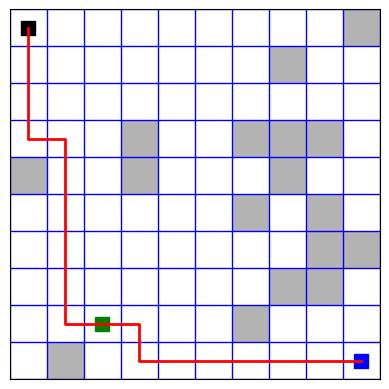

In [49]:
def generate_random_grid(size, obstacle_probability):
    return np.random.choice([0, 1], size=(size, size), p=[1-obstacle_probability, obstacle_probability])

# Define the size of the grid and the probability of an obstacle in each cell
grid_size = 10
obstacle_probability = 0.2  # 20% chance of being an obstacle

# Generate a random grid
grid = generate_random_grid(grid_size, obstacle_probability)

# Define start and goal positions
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# Ensure start and goal are not obstacles
grid[start] = 0
grid[goal] = 0

# Create the environment and agent
environment = Environment(grid, start, goal)
agent = Agent(environment)

# Solve the problem with the UCS algorithm
print("This is the solution using Uniform Cost Search algorithm")
solution_path_ucs = agent.uniform_cost_search()
charging_point = agent.battery_manager(solution_path_ucs)
#print("Solution Path:", solution_path_ucs)
print("Charging Points:", charging_point)

# Visualize the solution
visualize_grid_and_path(grid, solution_path_ucs, charging_point)

